<a href="https://colab.research.google.com/github/JSEFERINO/MISALUMNOS20252/blob/main/Lab15_Datos_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 15. Regresión Lineal - Varios Métodos**
<a name="inicio"></a>

## **Por Julio Hurtado**
# [Parte I. Librerias y Datos](#parte-i-librerias-y-datos)
# [Parte II. Regresión Lineal Usando - optimize.curve_fit](#parte-i-i-.--regresión-lineal-usando--optimize-curve_fit)
# [Parte III. Regresión Lineal Usando - Minimos Cuadrados](#parte-iii-regresión-lineal--usando--minimos-cuadrados)
# [Parte IV. Regresión Lineal Usando - Machine Learning](#parte-iv-regresión-lineal--usando--machine-learning)
# [Parte V. Regresión Lineal Usando - Bootstrap](#parte-iv-regresión-lineal--usando--Bootstrap)

# **Parte I. Librerias y Datos**
<a name="parte-i-librerias-y-datos"></a>

In [ ]:
# @title **Paso 1. Nuestras librerias mas usadas**
import numpy as np
from numpy.linalg import inv
import pandas as pd # para manejar los datos
import matplotlib.pyplot as plt # Para visualizar los datos
import random
import seaborn as sns
from sklearn.metrics import r2_score


In [ ]:
# @title **Paso 2. Ubicando nuestros datos**
url = 'https://raw.githubusercontent.com/JSEFERINO/MISALUMNOS20252/main/DATOS202460ULTIMOS.csv'

#https://github.com/JSEFERINO/MISALUMNOS20252/blob/main/DATOS202460ULTIMOS.csv

In [ ]:
# @title **Paso 3.  Construyendo nuestro DataFrame**
datos = pd.read_csv(url, delimiter=';') # Added delimiter
datos


,CURSO,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,...,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
0,PROBABILIDAD,100.0,90.0,3.6,4.30,2314.0,F_NEGOCIOS,20.0,55.0,160.0,...,BAJO,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO
1,ESTADISTICAI,70.0,75.0,0.9,2.50,1136.0,DERECHO,18.0,80.0,185.0,...,ALTO,ALTO,ALTO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,MEDIO
2,PROBABILIDAD,85.0,95.0,3.9,3.80,2314.0,F_NEGOCIOS,19.0,60.0,158.0,...,BAJO,BAJO,BAJO,BAJO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO
3,PROBABILIDAD,5.0,5.0,2.9,0.50,2314.0,MECANICA,18.0,72.0,181.0,...,MEDIO,ALTO,BAJO,MEDIO,MEDIO,ALTO,MEDIO,ALTO,MEDIO,MEDIO
4,ESTADISTICAI,20.0,70.0,3.7,0.55,1009.0,PSICOLOGÍA,19.0,45.0,163.0,...,ALTO,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# @title **Paso 4.  Elmina las filas NAN**

datos = datos.dropna()
datos

,CURSO,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,...,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
0,PROBABILIDAD,100.0,90.0,3.6,4.30,2314.0,F_NEGOCIOS,20.0,55.0,160.0,...,BAJO,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO
1,ESTADISTICAI,70.0,75.0,0.9,2.50,1136.0,DERECHO,18.0,80.0,185.0,...,ALTO,ALTO,ALTO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,MEDIO
2,PROBABILIDAD,85.0,95.0,3.9,3.80,2314.0,F_NEGOCIOS,19.0,60.0,158.0,...,BAJO,BAJO,BAJO,BAJO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO
3,PROBABILIDAD,5.0,5.0,2.9,0.50,2314.0,MECANICA,18.0,72.0,181.0,...,MEDIO,ALTO,BAJO,MEDIO,MEDIO,ALTO,MEDIO,ALTO,MEDIO,MEDIO
4,ESTADISTICAI,20.0,70.0,3.7,0.55,1009.0,PSICOLOGÍA,19.0,45.0,163.0,...,ALTO,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,PROBABILIDAD,90.0,90.0,2.3,2.10,2314.0,F_NEGOCIOS,18.0,59.0,176.0,...,MEDIO,MEDIO,MEDIO,ALTO,ALTO,ALTO,ALTO,BAJO,ALTO,ALTO
70,PROBABILIDAD,85.0,95.0,2.0,3.10,2314.0,F_NEGOCIOS,18.0,60.0,171.0,...,BAJO,BAJO,ALTO,ALTO,ALTO,BAJO,ALTO,BAJO,ALTO,BAJO
71,ESTADISTICAI,65.0,75.0,1.7,2.95,1136.0,DERECHO,20.0,55.0,164.0,...,BAJO,MEDIO,MEDIO,ALTO,ALTO,ALTO,BAJO,BAJO,MEDIO,BAJO
72,ESTADISTICAI,100.0,100.0,2.3,3.20,2313.0,PSICOLOGÍA,19.0,67.0,171.0,...,BAJO,BAJO,BAJO,BAJO,MEDIO,BAJO,BAJO,BAJO,BAJO,BAJO


In [ ]:
# @title **Paso 5.  Vamos hallar la Matriz de Correlaciones de nuestra data**
# Seleccionar solo las columnas numéricas para calcular la correlación
datos2 = datos.select_dtypes(include=np.number)
datos2


,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,EDAD,PESO,ESTATURA
0,100.0,90.0,3.6,4.30,2314.0,20.0,55.0,160.0
1,70.0,75.0,0.9,2.50,1136.0,18.0,80.0,185.0
2,85.0,95.0,3.9,3.80,2314.0,19.0,60.0,158.0
3,5.0,5.0,2.9,0.50,2314.0,18.0,72.0,181.0
4,20.0,70.0,3.7,0.55,1009.0,19.0,45.0,163.0
...,...,...,...,...,...,...,...,...
69,90.0,90.0,2.3,2.10,2314.0,18.0,59.0,176.0
70,85.0,95.0,2.0,3.10,2314.0,18.0,60.0,171.0
71,65.0,75.0,1.7,2.95,1136.0,20.0,55.0,164.0
72,100.0,100.0,2.3,3.20,2313.0,19.0,67.0,171.0


In [ ]:

# @title **Paso 6.  Calcular la matriz de correlación en el DataFrame numérico**
datos2.corr().round(2)

,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,EDAD,PESO,ESTATURA
ASISTENCIA2,1.00,0.63,0.08,0.73,0.03,0.04,-0.06,-0.04
ASISTENCIA1,0.63,1.00,0.09,0.48,0.04,0.06,-0.04,-0.12
PARCIAL 1,0.08,0.09,1.00,0.35,-0.09,-0.20,0.01,-0.10
PARCIAL 2,0.73,0.48,0.35,1.00,0.11,-0.11,-0.03,-0.06
NRC,0.03,0.04,-0.09,0.11,1.00,0.05,0.04,-0.00
EDAD,0.04,0.06,-0.20,-0.11,0.05,1.00,0.06,-0.08
PESO,-0.06,-0.04,0.01,-0.03,0.04,0.06,1.00,0.66
ESTATURA,-0.04,-0.12,-0.10,-0.06,-0.00,-0.08,0.66,1.00


In [ ]:
# @title **Paso 7.  Lista los pares de variable con mayor correlacion**

correlation_matrix = datos2.corr().abs()
# Eliminar la diagonal (correlación de una variable consigo misma)
np.fill_diagonal(correlation_matrix.values, 0)

# Desapilar la matriz para obtener pares de variables y sus correlaciones
stacked_corr = correlation_matrix.stack()

# Ordenar por correlación descendente
sorted_corr = stacked_corr.sort_values(ascending=False)

# Mostrar los pares con mayor correlación (ej. top 10)
print("Pares de variables con mayor correlación:")
print(sorted_corr.head(10))

Pares de variables con mayor correlación:
ASISTENCIA2  PARCIAL 2      0.725371
PARCIAL 2    ASISTENCIA2    0.725371
PESO         ESTATURA       0.658099
ESTATURA     PESO           0.658099
ASISTENCIA1  ASISTENCIA2    0.625722
ASISTENCIA2  ASISTENCIA1    0.625722
PARCIAL 2    ASISTENCIA1    0.484861
ASISTENCIA1  PARCIAL 2      0.484861
PARCIAL 2    PARCIAL 1      0.348642
PARCIAL 1    PARCIAL 2      0.348642
dtype: float64


In [ ]:
# @title **Paso 8.  Lista los pares de variable con mayor Covarianza**

correlation_matrix = datos2.corr().abs()
# Eliminar la diagonal (correlación de una variable consigo misma)
np.fill_diagonal(correlation_matrix.values, 0)

# Desapilar la matriz para obtener pares de variables y sus correlaciones
stacked_corr = correlation_matrix.stack()

# Ordenar por correlación descendente
sorted_corr = stacked_corr.sort_values(ascending=False)

# Mostrar los pares con mayor correlación (ej. top 10)
print("Pares de variables con mayor correlación:")
print(sorted_corr.head(10))

,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,EDAD,PESO,ESTATURA
ASISTENCIA2,311.84,167.43,1.36,11.17,334.32,0.89,-12.90,-5.33
ASISTENCIA1,167.43,229.60,1.43,6.41,337.59,1.00,-6.49,-16.15
PARCIAL 1,1.36,1.43,1.00,0.30,-52.49,-0.24,0.13,-0.88
PARCIAL 2,11.17,6.41,0.30,0.76,58.29,-0.11,-0.27,-0.49
NRC,334.32,337.59,-52.49,58.29,380718.77,35.59,267.23,-5.34
EDAD,0.89,1.00,-0.24,-0.11,35.59,1.44,0.81,-0.81
PESO,-12.90,-6.49,0.13,-0.27,267.23,0.81,130.69,64.56
ESTATURA,-5.33,-16.15,-0.88,-0.49,-5.34,-0.81,64.56,73.64


[⬆️ Volver al inicio](#inicio)

# **Parte II. Regresión Lineal Usando - optimize.curve_fit**

<a name="parte-i-i-.--regresión-lineal-usando--optimize-curve_fit"></a>

In [ ]:
# @title **Paso 9. Empecemos la Regresión Lineal - `optimize.curve_fit`**
datax = datos2['ESTATURA']
datay = datos2['PESO']

def f( x, p0, p1):
    return p0 + p1*x

def ff(x, p):
    return f(x, *p)

# Estos son los verdaderos parámetros
p0 = 1.0
p1 = 1.0


# Estas son conjeturas iniciales para ajustes:
pstart = [
    p0 + random.random(),
    p1 + random.random(),

]


In [ ]:
# @title **Paso 10.  Optimizar la Curva de ajuste - `optimize.curve_fit`**
from scipy import optimize
err_stdev = 0.2
def fit_curvefit(p0, datax, datay, function, yerr=err_stdev, **kwargs):# Definimos los parametros de nuestra función
    """
    Nota: Según la documentación actual (Scipy V1.1.0), sigma (yerr) debe ser:
         Ninguno o secuencia de longitud M o matriz MxM, opcional
     Por lo tanto, reemplace:
         err_stdev = 0.2
     Con:
         err_stdev = [0.2 para elemento en xdata]
     O similar, para crear una secuencia de longitud M para este ejemplo.
    """
    pfit3, pcov = optimize.curve_fit(f,datax,datay,p0=p0, sigma=None, epsfcn=0.0001, **kwargs) # usamos el metodo de curva fit

# ajustamos los datos y residuos
    error = []
    for i in range(len(pfit3)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_curvefit = pfit3
    perr_curvefit = np.array(error)

    return pfit_curvefit, perr_curvefit
    print('Algunas visualizaciones de lo construido hasta ahora:')
    print('Lo almacenado en pfit_curvefit es ', pfit_curvefit)
    print('Lo almacenado en perr_curvefit =',perr_curvefit)



pfit3, perr = fit_curvefit(pstart, datax, datay, ff)

print("\n# Fit parameters and parameter errors from curve_fit method :")
print("pfit = ", pfit3)
print("perr = ", perr)


# Fit parameters and parameter errors from curve_fit method :
pfit =  [-84.27869318   0.87666568]
perr =  [20.06402188  0.11903329]


## **Explicación del Paso 9**

Los términos `pfit` y `perr` obtenidos después de usar `optimize.curve_fit` en el código proporcionado tienen los siguientes significados:

*   **`pfit`**: Este término almacena los **parámetros óptimos** encontrados por la función `optimize.curve_fit` que mejor ajustan la función `f(x, p0, p1)` (en este caso, una línea recta) a los datos `datax` y `datay`. En esencia, `pfit` contiene los valores de `p0` y `p1` (la ordenada al origen y la pendiente de la línea de ajuste) que minimizan la suma de los cuadrados de los residuos entre los datos observados (`datay`) y los valores predichos por la función de ajuste (`f(datax, *pfit)`).

    En el contexto de tu código, `pfit` será un array que contiene dos valores:
    *   `pfit[0]` será el valor estimado de la ordenada al origen (`p0`).
    *   `pfit[1]` será el valor estimado de la pendiente (`p1`).

*   **`perr`**: Este término almacena los **errores estándar estimados** de los parámetros ajustados (`pfit`). Estos errores estándar son una medida de la incertidumbre en la determinación de cada parámetro. Un error estándar más pequeño indica que el parámetro se ha determinado con mayor precisión.

    `perr` es un array de la misma longitud que `pfit`. Cada elemento de `perr` corresponde al error estándar del parámetro ajustado en la misma posición en `pfit`.

    En tu código:
    *   `perr[0]` será el error estándar estimado para la ordenada al origen (`p0`).
    *   `perr[1]` será el error estándar estimado para la pendiente (`p1`).

La forma en que se calculan estos errores estándar en tu código es tomando la raíz cuadrada de los elementos diagonales de la matriz de covarianza (`pcov`) devuelta por `optimize.curve_fit`. La matriz de covarianza (`pcov`) contiene información sobre la covarianza entre los diferentes parámetros ajustados, y sus elementos diagonales representan las varianzas de cada parámetro. La raíz cuadrada de la varianza es el error estándar.

In [ ]:
# @title **Paso 11.  Bondad de Ajuste $R^2$ para el método de regresión `curve.fit`**
from sklearn.metrics import r2_score
r2 = r2_score(datay, f( datax, *pfit3))
print('El coeficiente de Bondad de Ajuste o de Determinación del modelo R_cuadrado = ', round(r2,3))
print('Esto es, el modelo explica la variabilidad observada en la respuesta en un porcentaje de ', round(r2*100,1), '%')

El coeficiente de Bondad de Ajuste o de Determinación del modelo R_cuadrado =  0.433
Esto es, el modelo explica la variabilidad observada en la respuesta en un porcentaje de  43.3 %


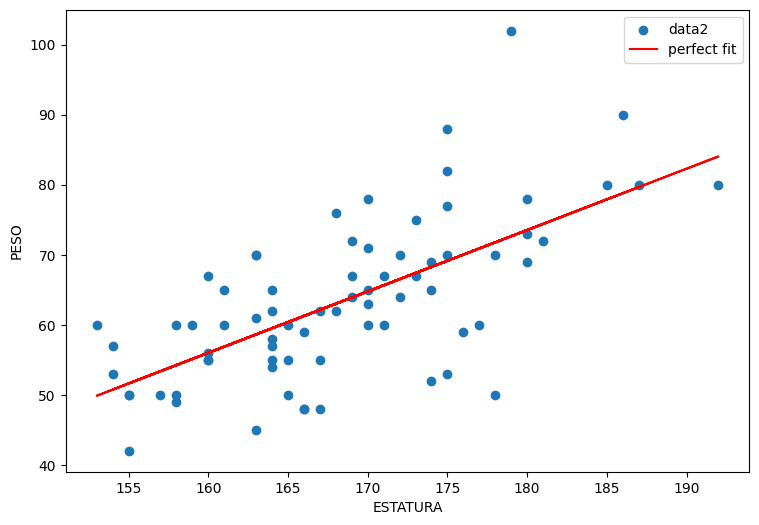

In [ ]:
# @title **Paso 12.  Diagrama de Dispersión y curva `perfect fit`**
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(datax,datay,label="data2")
x0=datax #np.linspace(data["G3"].min(),data["G3"].max(),7)
plt.plot(x0,f(x0,*pfit3),color="r",label="perfect fit")
plt.xlabel("ESTATURA")
plt.ylabel("PESO")
plt.legend()
plt.show()


[⬆️ Volver al inicio](#inicio1)

# **Parte III. Regresión Lineal Usando - Minimos Cuadrados**
<a name="parte-iii-regresión-lineal--usando--minimos-cuadrados"></a>  

In [ ]:
# @title **Paso 13.  Regresión lineal - MINIMOS CUADRADOS - Least Squares**
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
# @title **Paso 14.  Regresión lineal - MINIMOS CUADRADOS - OLS**
# nuestras variables independiente y dependiente

X = datos2['ESTATURA']
y = datos2['PESO']

# para obtener intercepción -- esto es opcional

X = sm.add_constant(X)

# ajustar el modelo de regresión

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PESO   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     54.24
Date:                Mon, 19 May 2025   Prob (F-statistic):           2.50e-10
Time:                        16:06:30   Log-Likelihood:                -260.22
No. Observations:                  73   AIC:                             524.4
Df Residuals:                      71   BIC:                             529.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -84.2787     20.064     -4.200      0.000    -124.285     -44.272
ESTATURA       0.8767      0.119      7.365      0.000       0.639       1.114
==============================================================================
Omnibus:                        4.828   Durbin-Watson:                   2.182
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                4.939
Skew:                           0.298   Prob(JB):                       0.0846
Kurtosis:                       4.126   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Paso 13.  Regresión lineal - MINIMOS CUADRADOS - OLS**
+ Regresión Simple - peso vs. estatura
+ Variable dependiente: peso
+ Variable independiente: estatura
+ Lineal: Y = a + b*X
+ Número de observaciones: 74


|Parámetro|	Mínimos Cuadrados Estimado|	Estándar Error	|Estadístico T	|Valor-P|
|--|--|--|--|--|
|Intercepto|	-84,1267|	19,9092 |	-4,22553	|0,0001
|Pendiente|	0,875642	| 0,118082 | 	7,41556	|0,0000

**Análisis de Varianza**

|Fuente|	Suma de Cuadrados|	Gl|	Cuadrado Medio|	Razón-F|	Valor-P|
|--|--|--|--|--|--|
|Modelo	|4075,76	|1	|4075,76	|54,99	|0,0000|
|Residuo|	5336,46	|72	|74,1175	|-|-|
|Total (Corr.)|	9412,22|	73|	-| -|-|

+ Coeficiente de Correlación = 0,658049
+ R-cuadrada = 43,3029 porciento
+ R-cuadrado (ajustado para g.l.) = 42,5154 porciento
+ Error estándar del est. = 8,60915
+ Error absoluto medio = 6,23661
+ Estadístico Durbin-Watson = 2,16347 (P=0,7602)
+ Autocorrelación de residuos en retraso 1 = -0,081837

**Concluisón**:
La salida muestra los resultados de ajustar un modelo  para describir la relación entre peso y estatura.  La ecuación del modelo ajustado es

   $$peso = -84,1267 + 0,875642*estatura$$

*Puesto que el valor-P en la tabla ANOVA es menor que 0,05, existe una relación estadísticamente significativa entre peso y estatura con un nivel de confianza del 95,0%.*

*El estadístico R-Cuadrada indica que el modelo ajustado explica 43,3029% de la variabilidad en peso.  El coeficiente de correlación es igual a 0,658049, indicando una relación moderadamente fuerte entre las variables.  El error estándar del estimado indica que la desviación estándar de los residuos es 8,60915.  Este valor puede usarse para construir límites de predicción para nuevas observaciones, seleccionando la opción de Pronósticos del menú de texto.*

*El error absoluto medio (MAE) de 6,23661 es el valor promedio de los residuos.  El estadístico de Durbin-Watson (DW) examina los residuos para determinar si hay alguna correlación significativa basada en el orden en el que se presentan en el archivo de datos.  Puesto que el valor-P es mayor que 0,05, no hay indicación de una autocorrelación serial en los residuos con un nivel de confianza del 95,0%.*  




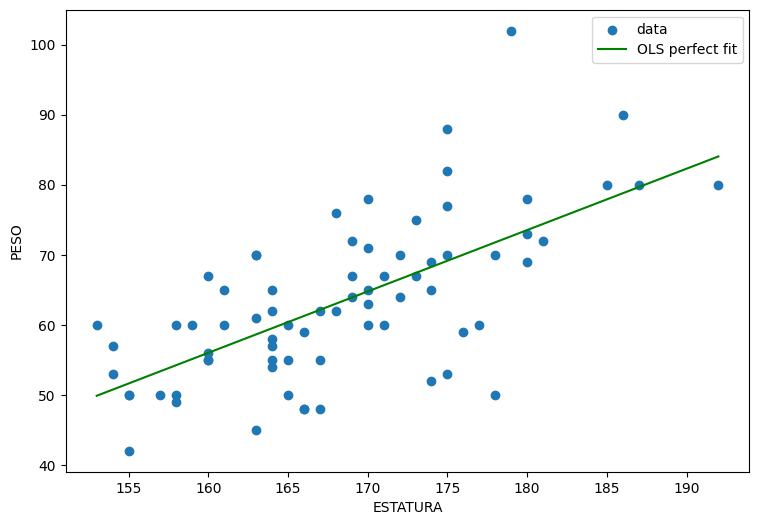

In [ ]:
# @title **Paso 15.  Hacer el grafico de Dispersión pero usando Minimos cuadrados:**

# Plotting using the OLS results from Paso 13
plt.figure(figsize=(30,6))
plt.subplot(131)


plt.scatter(datax, datay, label="data")


p0_ols = reg.params['const']
p1_ols = reg.params['ESTATURA']
# Define the function for the OLS line
def ols_line(x, p0, p1):
    return p0 + p1 * x


x_plot = np.linspace(datax.min(), datax.max(), 100)
plt.plot(x_plot, ols_line(x_plot, p0_ols, p1_ols), color="g", label="OLS perfect fit")
plt.xlabel("ESTATURA")
plt.ylabel("PESO")
plt.legend()
plt.show()

In [ ]:
# @title **Paso 16.  Regresión Múltiple con Variables altamente correlacionadas en la data**
X = datos2[['ASISTENCIA2','ASISTENCIA1',"PARCIAL 1"]]   #  variables independientes
y = datos2['PARCIAL 2']   #  variables dependientes


# para obtener intercepción -- esto es opcional

X = sm.add_constant(X)

# ajustar el modelo de regresión

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PARCIAL 2   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     36.42
Date:                Mon, 19 May 2025   Prob (F-statistic):           3.18e-14
Time:                        16:06:31   Log-Likelihood:                -58.467
No. Observations:                  73   AIC:                             124.9
Df Residuals:                      69   BIC:                             134.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7378      0.425     -1.734      0.087      -1.586       0.111
ASISTENCIA2     0.0338      0.005      7.130      0.000       0.024       0.043
ASISTENCIA1     0.0017      0.006      0.298      0.766      -0.009       0.013
PARCIAL 1       0.2561      0.066      3.897      0.000       0.125       0.387
==============================================================================
Omnibus:                        3.195   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.544
Skew:                          -0.444   Prob(JB):                        0.280
Kurtosis:                       3.215   Cond. No.                         825.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Explicación: Me puedes explicar cada termino del resultado del analisis en Español**


**Regresión Múltiple con Variables altamente correlacionadas en la data**

+ Esta sección se refiere al análisis donde intentas predecir la variable 'PARCIAL 2' (variable dependiente) usando las variables 'ASISTENCIA2', 'ASISTENCIA1' y 'PARCIAL 1' (variables independientes). El código utiliza el método de Mínimos Cuadrados Ordinarios (OLS) de la librería `statsmodels`.

+ El resultado típico de un análisis de regresión OLS en `statsmodels.api` incluye varias tablas y métricas. Vamos a desglosar los términos clave que verías en un resumen de `reg.summary()`:

**Tabla de Coeficientes (Parte principal del resumen):**

*   **const / Intercepto:** Este es el término constante en tu modelo de regresión. Representa el valor esperado de la variable dependiente ('PARCIAL 2') cuando todas las variables independientes ('ASISTENCIA2', 'ASISTENCIA1', 'PARCIAL 1') son cero. Es la ordenada al origen de la ecuación de regresión.

*   **Nombre de la Variable Independiente (Ej: ASISTENCIA2, ASISTENCIA1, PARCIAL 1):** El nombre de cada variable predictora en tu modelo.

*   **coef (Coeficiente):** Este es el coeficiente estimado para cada variable independiente. Indica cuánto se espera que cambie la variable dependiente ('PARCIAL 2') por cada unidad de aumento en esa variable independiente, manteniendo constantes las otras variables en el modelo. Por ejemplo, si el coeficiente de 'PARCIAL 1' es 0.5, significa que por cada punto adicional en 'PARCIAL 1', se espera que 'PARCIAL 2' aumente en 0.5 puntos, asumiendo que 'ASISTENCIA2' y 'ASISTENCIA1' no cambian.

*   **std err (Error Estándar):** Es una medida de la variabilidad o incertidumbre en la estimación del coeficiente. Un error estándar pequeño indica que la estimación del coeficiente es más precisa.

*   **t (Estadístico t):** Este es el estadístico de prueba para el coeficiente. Se calcula dividiendo el coeficiente por su error estándar (`coef / std err`). Se utiliza para probar si el coeficiente es significativamente diferente de cero. Un valor absoluto grande del estadístico t sugiere que el coeficiente es significativo.

*   **P>|t| (Valor P):** Es la probabilidad de observar un estadístico t tan extremo (o más extremo) como el calculado, si la hipótesis nula (que el coeficiente real es cero) fuera cierta. Un valor P bajo (típicamente menor que 0.05) indica que el coeficiente es estadísticamente significativo, lo que significa que hay evidencia sólida para concluir que la variable independiente tiene un efecto real sobre la variable dependiente, después de controlar por las otras variables en el modelo.

*   **[0.025, 0.975] (Intervalo de Confianza del 95%):** Este es el intervalo de confianza del 95% para el coeficiente. Significa que, si repitiéramos el proceso de muestreo y estimación muchas veces, el 95% de las veces, este intervalo contendría el verdadero valor del coeficiente de la población. Si el intervalo no incluye cero, es otra indicación de que el coeficiente es estadísticamente significativo al nivel del 5%.

**Tabla de Resumen del Modelo (Arriba o abajo de la tabla de coeficientes):**

*   **R-squared (R-cuadrado):** Esta métrica indica la proporción de la varianza en la variable dependiente ('PARCIAL 2') que es explicada por las variables independientes en el modelo. Un R-cuadrado de 0.60 significa que el 60% de la variabilidad en 'PARCIAL 2' es explicada por 'ASISTENCIA2', 'ASISTENCIA1' y 'PARCIAL 1' combinadas. Un valor más alto indica un mejor ajuste del modelo a los datos.

*   **Adj. R-squared (R-cuadrado Ajustado):** Es una versión modificada del R-cuadrado que se ajusta por el número de predictores en el modelo y el tamaño de la muestra. Es útil para comparar modelos con diferente número de variables. Tiende a ser menor que el R-cuadrado y penaliza la adición de variables que no mejoran significativamente el ajuste del modelo.

*   **F-statistic (Estadístico F):** Este es el estadístico de prueba para la significancia general del modelo. Prueba la hipótesis nula de que *todos* los coeficientes de las variables independientes (excluyendo el intercepto) son cero simultáneamente. Un valor grande del estadístico F sugiere que al menos una de las variables independientes tiene un efecto significativo sobre la variable dependiente.

*   **Prob (F-statistic) (Valor P del Estadístico F):** Es la probabilidad de observar un estadístico F tan extremo (o más extremo) como el calculado, si la hipótesis nula de que todos los coeficientes son cero fuera cierta. Un valor P bajo (típicamente menor que 0.05) indica que el modelo en su conjunto es estadísticamente significativo, lo que significa que las variables independientes juntas explican una cantidad significativa de la variación en la variable dependiente.

*   **Log-Likelihood:** Es una medida de qué tan bien el modelo ajusta los datos. Valores más altos indican un mejor ajuste, pero su interpretación directa es menos intuitiva que el R-cuadrado.

*   **AIC (Criterio de Información de Akaike):** Es una medida para comparar la calidad de diferentes modelos. Penaliza la complejidad del modelo (número de variables). Un valor AIC más bajo generalmente indica un mejor modelo.

*   **BIC (Criterio de Información Bayesiano):** Similar al AIC, también se utiliza para la selección de modelos, penalizando la complejidad. Un valor BIC más bajo es preferible.

**Tabla de Pruebas de Normalidad, Multicolinealidad, etc. (Parte inferior del resumen):**

*   **Omnibus / Prob(Omnibus):** Es una prueba de la normalidad de los residuos. El valor P asociado (Prob(Omnibus)) indica si los residuos siguen una distribución normal. Un valor P bajo sugiere una desviación de la normalidad.

*   **Jarque-Bera (JB) / Prob(JB):** Otra prueba de normalidad de los residuos. Un valor P bajo sugiere que los residuos no siguen una distribución normal.

*   **Skew (Asimetría):** Mide la asimetría de la distribución de los residuos. Un valor cercano a cero indica simetría.

*   **Kurtosis (Curtosis):** Mide qué tan "puntiaguda" o "aplanada" es la distribución de los residuos en comparación con una distribución normal. Un valor cercano a 3 (o 0 en algunas definiciones) indica una curtosis similar a la normal.

*   **Durbin-Watson:** Estadístico que prueba la autocorrelación serial de los residuos. Un valor cercano a 2 sugiere que no hay autocorrelación. Valores significativamente diferentes de 2 (más bajos o más altos) pueden indicar autocorrelación positiva o negativa, respectivamente.

*   **Cond. No. (Número de Condición):** Es una medida de la multicolinealidad en las variables predictoras. Un número de condición alto (generalmente por encima de 30) sugiere que hay una alta multicolinealidad, lo que significa que algunas variables independientes están fuertemente correlacionadas entre sí. La multicolinealidad puede dificultar la interpretación de los coeficientes individuales y aumentar sus errores estándar.

**En resumen, el análisis de regresión lineal múltiple te ayuda a entender cómo múltiples variables independientes influyen en una variable dependiente y la fuerza y significancia de esas relaciones. Los términos en el resumen de `statsmodels` te proporcionan las estimaciones de los efectos, su incertidumbre, y métricas para evaluar qué tan bien se ajusta el modelo a los datos y si se cumplen los supuestos clave de la regresión lineal.**

[⬆️ Volver al inicio](#inicio)

# **Parte IV. Regresión Lineal Usando - Machine Learning**
<a name="parte-iv-regresión-lineal--usando--machine-learning"></a>

## **Paso 16. Contexto del  Machine Learning**

+ Con *sklearn.model_selection.train_test_split* usted está creando 4 porciones de datos que se utilizarán para ajustar y predecir valores.

+ X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

+ X_train, X_test, y_train, y_test

+ 1). **X_train** : esto incluye todas sus variables independientes, se usarán para entrenar el modelo, también como hemos especificado test_size = 0.4, este medio **60%** de observaciones de sus datos completos se usará para entrenar/ajustar el modelo y el resto **40%** se usará para probar el modelo.

+ 2). **X_test** : esta es **40%** la porción restante de las variables independientes de los datos que no se usarán en la fase de entrenamiento y se usarán para hacer predicciones para probar la precisión del modelo.

+ 3). **y_train** : esta es su variable dependiente que debe ser predicha por este modelo, esto incluye etiquetas de categoría contra sus variables independientes, necesitamos especificar nuestra variable dependiente mientras entrenamos/ajustamos el modelo.

+ 4). **y_test** : estos datos tienen etiquetas de categoría para sus datos de prueba, estas etiquetas se utilizarán para probar la precisión entre las categorías reales y predichas.

Ahora puede ajustar un modelo en estos datos,

In [ ]:
# @title **Paso 17. importando `train_test_split` desde `sklearn`**
from sklearn.model_selection import train_test_split

# nuestras variables independiente y dependiente
X = datos2['ESTATURA']
y = datos2['PESO']

# para obtener intercepción -- esto es opcional

X = sm.add_constant(X)


# dividir los datos en entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# @title **Paso 18. Selección del método de Regresión Lineal de la Biblioteca scikit-learn**

from sklearn.linear_model import LinearRegression

# creando un objeto de la clase LinearRegression

LR = LinearRegression()

# ajustando los datos de entrenamiento

LR.fit(x_train,y_train)

# modelo de regresión
modelo = LR.fit(x_train,y_train)


In [ ]:
# @title **Paso 19. Evaluación del modelo entrenado sobre los datos de entrenamiento**
from sklearn import metrics
from sklearn import metrics # Import the metrics module

y_prediction_train =  modelo.predict(x_train)
print('Error Absoluto Medio en datos train es MAE =', metrics.mean_absolute_error(y_train,y_prediction_train))
y_prediction_train
y_prediction_train =np.array(y_prediction_train)
df_train = pd.DataFrame(y_prediction_train)
df_train

Error Absoluto Medio en datos train es MAE = 6.997813997891959


,0
0,73.072613
1,63.858007
2,59.250703
3,85.051602
4,50.957557
5,59.250703
6,55.564861
7,62.015085
8,62.936546
9,64.779467


In [ ]:
# @title **Paso 20. Evaluación del modelo entrenado sobre los datos de prueba**
y_prediction_test =  modelo.predict(x_test)
print('Error Absoluto Medio en datos de prueba es MAE =', metrics.mean_absolute_error(y_test,y_prediction_test))
y_prediction_test
y_prediction_test =np.array(y_prediction_test)
df_test = pd.DataFrame(y_prediction_test)
df_test

Error Absoluto Medio en datos de prueba es MAE = 3.626997928612488


,0
0,58.329243
1,66.622389
2,73.994074
3,55.564861
4,64.779467
5,60.172164
6,68.465310
7,59.250703
8,49.114636
9,66.622389


In [ ]:
# @title **Paso 21. Importando r2_score module**
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction_test)
print("El valor de R2 =",score)
print("Error Cuadrático Medio MSE ==",mean_squared_error(y_test,y_prediction_test))
print("Raiz Error Cuadrático Medio RMSE ==",np.sqrt(mean_squared_error(y_test,y_prediction_test)))

El valor de R2 = 0.44035487604009704
Error Cuadrático Medio MSE == 28.181241130958668
Raiz Error Cuadrático Medio RMSE == 5.3086006754095445


# **f. Predicción total**

In [ ]:
# @title **Paso 22. Predicción total**
y_prediction_all =  LR.predict(X)
print(pd.DataFrame(np.array(y_prediction_all)))

            0
0   55.564861
1   78.601377
2   53.721939
3   74.915535
4   58.329243
..        ...
68  70.308231
69  65.700928
70  59.250703
71  65.700928
72  60.172164

[73 rows x 1 columns]


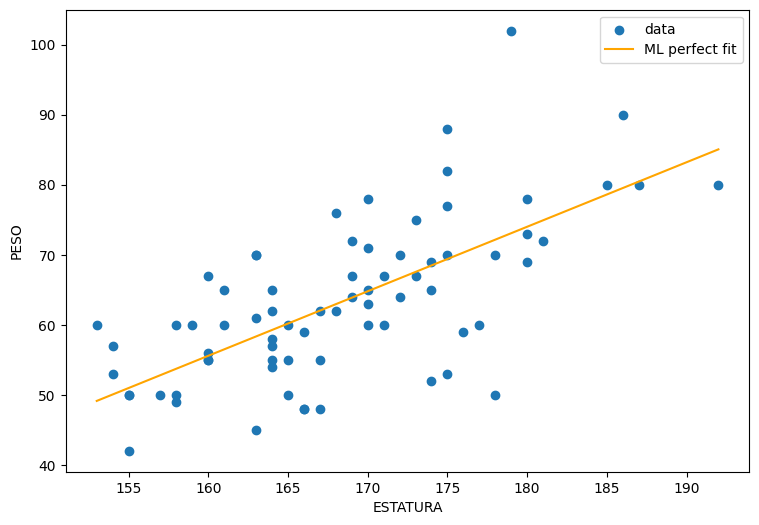

In [ ]:

# @title **Paso 23. Hacer el grafico de Dispersión pero usando Machine Learning obtenido**

# Plotting using the Machine Learning results from Paso 18
plt.figure(figsize=(30,6))
plt.subplot(131)


plt.scatter(datax, datay, label="data")


# Get the predicted values for all data points using the trained ML model
y_prediction_all =  LR.predict(X)


# Sort the data by the independent variable (ESTATURA) to ensure the line is plotted correctly
sorted_indices = np.argsort(datax)
datax_sorted = datax.iloc[sorted_indices]
y_prediction_all_sorted = y_prediction_all[sorted_indices]

plt.plot(datax_sorted, y_prediction_all_sorted, color="orange", label="ML perfect fit")
plt.xlabel("ESTATURA")
plt.ylabel("PESO")
plt.legend()
plt.show()


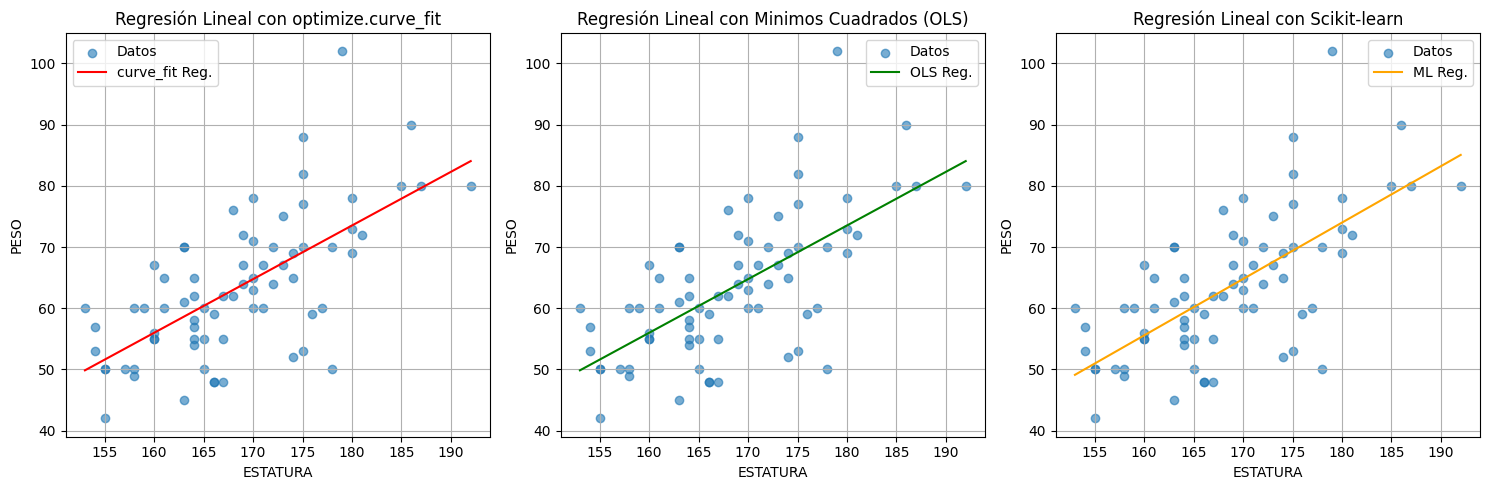

In [ ]:
# @title **Paso 24. Un solo codigo trabaja los tres metodos de regresion lineal estudiados con los graficos**

# Combinar los gráficos en una sola figura para comparación
plt.figure(figsize=(15, 5))

# Gráfico para optimize.curve_fit (Regresión 1)
plt.subplot(1, 3, 1)
plt.scatter(datax, datay, label="Datos", alpha=0.6)
x0 = np.linspace(datax.min(), datax.max(), 100)
plt.plot(x0, f(x0, *pfit3), color="r", label="curve_fit Reg.")
plt.xlabel("ESTATURA")
plt.ylabel("PESO")
plt.title("Regresión Lineal con optimize.curve_fit")
plt.legend()
plt.grid(True)

# Gráfico para OLS (Regresión 2)
plt.subplot(1, 3, 2)
plt.scatter(datax, datay, label="Datos", alpha=0.6)
x_plot = np.linspace(datax.min(), datax.max(), 100)
plt.plot(x_plot, ols_line(x_plot, p0_ols, p1_ols), color="g", label="OLS Reg.")
plt.xlabel("ESTATURA")
plt.ylabel("PESO")
plt.title("Regresión Lineal con Minimos Cuadrados (OLS)")
plt.legend()
plt.grid(True)

# Gráfico para Scikit-learn Linear Regression (Regresión 3)
plt.subplot(1, 3, 3)
plt.scatter(datax, datay, label="Datos", alpha=0.6)
# Get the predicted values for all data points using the trained ML model
y_prediction_all =  LR.predict(X) # Use the full X data here
# Sort the data by the independent variable (ESTATURA) to ensure the line is plotted correctly
sorted_indices = np.argsort(datax)
datax_sorted = datax.iloc[sorted_indices]
y_prediction_all_sorted = y_prediction_all[sorted_indices]
plt.plot(datax_sorted, y_prediction_all_sorted, color="orange", label="ML Reg.")
plt.xlabel("ESTATURA")
plt.ylabel("PESO")
plt.title("Regresión Lineal con Scikit-learn")
plt.legend()
plt.grid(True)


plt.tight_layout() # Ajustar el diseño para evitar superposición
plt.show()


[⬆️ Volver al inicio](#inicio)

# **Parte V. Regresión Lineal Usando - Bootstrap**
<a name ="parte-iv-regresión-lineal--usando--Bootstrap"></a>

Coeficiente 'a' (Intercepto) promedio con Bootstrap: -84.6040
Coeficiente 'b' (Pendiente) promedio con Bootstrap: 0.8782


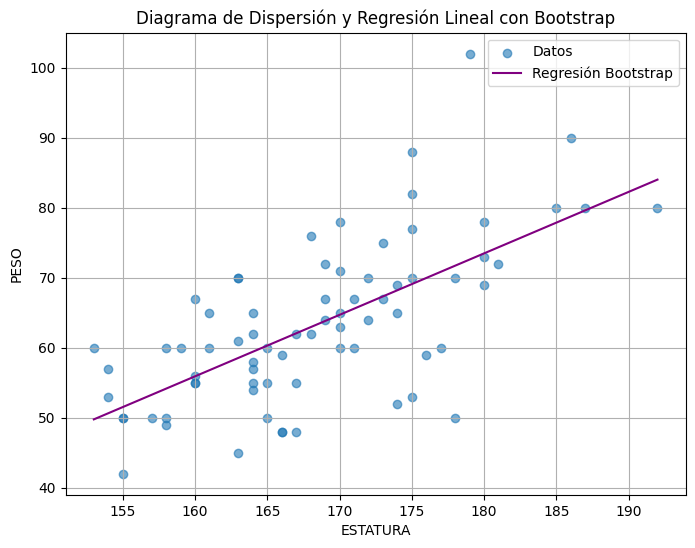

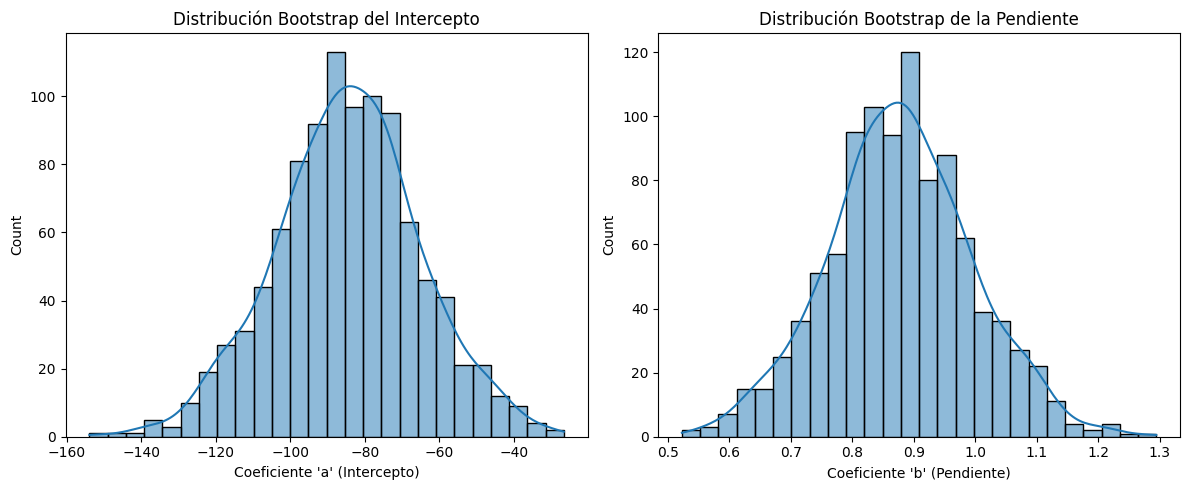

In [ ]:
# prompt: Haz la regresion usando Bootstrap, dibuja el diagrama de dispersion

# @title **Paso 25. Regresión Lineal con Bootstrap y Diagrama de Dispersión**

# Definir la función para la regresión lineal
def linear_model(x, a, b):
  return a + b * x

# Número de remuestreos bootstrap
n_bootstrap = 1000

# Listas para almacenar los coeficientes estimados de cada remuestreo
bootstrap_a = []
bootstrap_b = []

# Realizar remuestreo bootstrap
for _ in range(n_bootstrap):
  # Muestrear con reemplazo de los datos originales
  sample_indices = np.random.choice(len(datax), size=len(datax), replace=True)
  bootstrap_x = datax.iloc[sample_indices]
  bootstrap_y = datay.iloc[sample_indices]

  # Ajustar el modelo lineal a la muestra bootstrap
  try:
    popt, pcov = optimize.curve_fit(linear_model, bootstrap_x, bootstrap_y)
    bootstrap_a.append(popt[0])
    bootstrap_b.append(popt[1])
  except RuntimeError:
    # Manejar casos donde curve_fit no converge
    pass

# Calcular los coeficientes promedio de bootstrap
mean_a = np.mean(bootstrap_a)
mean_b = np.mean(bootstrap_b)

print(f"Coeficiente 'a' (Intercepto) promedio con Bootstrap: {mean_a:.4f}")
print(f"Coeficiente 'b' (Pendiente) promedio con Bootstrap: {mean_b:.4f}")

# Dibujar el diagrama de dispersión y la línea de regresión bootstrap
plt.figure(figsize=(8, 6))
plt.scatter(datax, datay, label="Datos", alpha=0.6)

# Dibujar la línea de regresión basada en los coeficientes promedio de bootstrap
x_plot = np.linspace(datax.min(), datax.max(), 100)
plt.plot(x_plot, linear_model(x_plot, mean_a, mean_b), color="purple", label="Regresión Bootstrap")

plt.xlabel("ESTATURA")
plt.ylabel("PESO")
plt.title("Diagrama de Dispersión y Regresión Lineal con Bootstrap")
plt.legend()
plt.grid(True)
plt.show()

# Opcional: Visualizar la distribución de los coeficientes bootstrap
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(bootstrap_a, kde=True)
plt.xlabel("Coeficiente 'a' (Intercepto)")
plt.title("Distribución Bootstrap del Intercepto")

plt.subplot(1, 2, 2)
sns.histplot(bootstrap_b, kde=True)
plt.xlabel("Coeficiente 'b' (Pendiente)")
plt.title("Distribución Bootstrap de la Pendiente")

plt.tight_layout()
plt.show()


In [ ]:
# @title **Paso 26.  Los cuatro metodos de regresion vistos, los parametros calculados, AIC y el valor de R2**
# nuestras variables independiente y dependiente

X_estatura = datos2['ESTATURA'] # Usar un nombre diferente para la variable independiente en este paso
y_peso = datos2['PESO'] # Usar un nombre diferente para la variable dependiente en este paso

# para obtener intercepción -- esto es opcional

X_estatura = sm.add_constant(X_estatura)

# ajustar el modelo de regresión y almacenar en una nueva variable
reg_estatura_peso = sm.OLS(y_peso, X_estatura).fit()
reg_estatura_peso.summary()
# Crear un diccionario para almacenar los resultados
results = {
    'Método': [],
    'Parámetro A (Intercepto)': [],
    'Parámetro B (Pendiente)': [],
    'Error Estándar A': [],
    'Error Estándar B': [],
    'AIC': [],
    'R2': []
}

# --- Método 1: optimize.curve_fit ---
# Los parámetros y sus errores ya se calcularon en pfit3 y perr
results['Método'].append('optimize.curve_fit')
results['Parámetro A (Intercepto)'].append(pfit3[0])
results['Parámetro B (Pendiente)'].append(pfit3[1])
results['Error Estándar A'].append(perr[0])
results['Error Estándar B'].append(perr[1])
# curve_fit no proporciona AIC directamente, se puede calcular pero requiere más pasos.
# Para simplificar, lo marcamos como no disponible.
results['AIC'].append('N/A')
results['R2'].append(r2_score(datay, f( datax, *pfit3))) # R2 calculado en Paso 10


# --- Método 2: Minimos Cuadrados (statsmodels OLS) ---
# Los resultados del summary de OLS tienen los parámetros, errores estándar y AIC/R2
# Usar la variable reg_estatura_peso que contiene los resultados del OLS para Estatura vs Peso
results['Método'].append('Minimos Cuadrados (OLS)')
results['Parámetro A (Intercepto)'].append(reg_estatura_peso.params['const'])
results['Parámetro B (Pendiente)'].append(reg_estatura_peso.params['ESTATURA'])
results['Error Estándar A'].append(reg_estatura_peso.bse['const'])
results['Error Estándar B'].append(reg_estatura_peso.bse['ESTATURA'])
results['AIC'].append(reg_estatura_peso.aic)
results['R2'].append(reg_estatura_peso.rsquared)

# --- Método 3: Machine Learning (scikit-learn LinearRegression) ---
# scikit-learn da los coeficientes y R2, pero no errores estándar directos ni AIC
# Ya se calculó en Pasos 18-21
# Ensure LR.coef_ is handled correctly for single feature case
results['Método'].append('Machine Learning (sklearn LR)')
# Access intercept
results['Parámetro A (Intercepto)'].append(LR.intercept_[0] if isinstance(LR.intercept_, np.ndarray) else LR.intercept_)
# Access coefficient for the single feature ('ESTATURA')
results['Parámetro B (Pendiente)'].append(LR.coef_[0][1] if isinstance(LR.coef_[0], np.ndarray) else (LR.coef_[1] if len(LR.coef_) > 1 else LR.coef_[0])) # Adjusted access for coefficient
results['Error Estándar A'].append('N/A') # scikit-learn no da errores estándar directos
results['Error Estándar B'].append('N/A') # scikit-learn no da errores estándar directos
results['AIC'].append('N/A') # scikit-learn no da AIC directo
results['R2'].append(r2_score(y_test, y_prediction_test)) # R2 calculado en Paso 21 (sobre datos de prueba)

# --- Método 4: Bootstrap ---
# Los coeficientes promedio de bootstrap se calcularon en Paso 25
# Los errores estándar se pueden estimar a partir de la desviación estándar de las distribuciones bootstrap
results['Método'].append('Bootstrap')
results['Parámetro A (Intercepto)'].append(mean_a)
results['Parámetro B (Pendiente)'].append(mean_b)
results['Error Estándar A'].append(np.std(bootstrap_a)) # Estimado del error estándar via bootstrap
results['Error Estándar B'].append(np.std(bootstrap_b)) # Estimado del error estándar via bootstrap
results['AIC'].append('N/A') # Bootstrap no da AIC
# Calcular R2 para el modelo con coeficientes promedio de bootstrap
r2_bootstrap = r2_score(datay, linear_model(datax, mean_a, mean_b))
results['R2'].append(r2_bootstrap)

# Crear el DataFrame a partir del diccionario
results_df = pd.DataFrame(results)

# Formatear para mejor lectura (opcional)
results_df = results_df.round(4)
results_df['AIC'] = results_df['AIC'].apply(lambda x: round(x, 2) if isinstance(x, (int, float)) else x)


# Mostrar la tabla
print("\nTabla Comparativa de Métodos de Regresión")
print(results_df.to_markdown(index=False))


Tabla Comparativa de Métodos de Regresión
| Método                        |   Parámetro A (Intercepto) |   Parámetro B (Pendiente) | Error Estándar A   | Error Estándar B    | AIC    |     R2 |
|:------------------------------|---------------------------:|--------------------------:|:-------------------|:--------------------|:-------|-------:|
| optimize.curve_fit            |                   -84.2787 |                    0.8767 | 20.064021878403945 | 0.1190332936722905  | N/A    | 0.4331 |
| Minimos Cuadrados (OLS)       |                   -84.2787 |                    0.8767 | 20.064021878403555 | 0.11903329367228932 | 524.44 | 0.4331 |
| Machine Learning (sklearn LR) |                   -91.8688 |                    0.9215 | N/A                | N/A                 | N/A    | 0.4404 |
| Bootstrap                     |                   -84.604  |                    0.8782 | 19.3961419824914   | 0.11757526148619327 | N/A    | 0.4331 |


# prompt: Cual es la diferencia entre: optimize.curve_fit y Minimos Cuadrados (OLS)

La diferencia fundamental entre `optimize.curve_fit` y `Minimos Cuadrados (OLS)` radica en su **generalidad y enfoque principal**, aunque para una regresión lineal simple como `y = a + bx`, ambos pueden llegar a resultados muy similares.

Aquí te explico las diferencias en el contexto de tu código:

1.  **`optimize.curve_fit`:**
    *   **Generalidad:** Es una función más **general** para ajustar **cualquier función arbitraria** a los datos mediante el método de mínimos cuadrados no lineal. La función que ajustas (`f` en tu código: `f( x, p0, p1) = p0 + p1*x`) debe ser definida por el usuario.
    *   **Enfoque:** Su objetivo es encontrar los parámetros `p0` y `p1` que minimizan la suma de los cuadrados de los residuos entre los datos observados (`datay`) y los valores predichos por la función `f(datax, *pfit)`.
    *   **Aplicación en tu código:** Lo usas para ajustar específicamente una función lineal (`p0 + p1*x`) a los datos de `ESTATURA` y `PESO`. Es decir, estás usando una herramienta general para un caso específico (regresión lineal).
    *   **Salida:** Devuelve los **parámetros óptimos (`pfit`)** y la **matriz de covarianza (`pcov`)**. A partir de la matriz de covarianza, puedes estimar los errores estándar de los parámetros. No proporciona directamente un resumen estadístico completo como OLS.

2.  **Minimos Cuadrados (OLS - Ordinary Least Squares) usando `statsmodels`:**
    *   **Generalidad:** `statsmodels` es una biblioteca diseñada específicamente para **modelos estadísticos**, incluida la regresión lineal. El método `OLS` implementa directamente el método de Mínimos Cuadrados Ordinarios para ajustar modelos lineales.
    *   **Enfoque:** Su enfoque principal es la **inferencia estadística** sobre las relaciones entre las variables. No solo encuentra los parámetros que minimizan los residuos, sino que también proporciona un análisis detallado de la significancia estadística de los parámetros, bondad de ajuste del modelo, y pruebas de supuestos.
    *   **Aplicación en tu código:** Lo usas en el "Paso 13" para ajustar un modelo de regresión lineal `PESO ~ ESTATURA`. Está diseñado para este tipo de análisis.
    *   **Salida:** Proporciona un **resumen estadístico muy completo (`reg.summary()`)** que incluye:
        *   Estimados de los coeficientes (intercepto y pendiente).
        *   Errores estándar de los coeficientes.
        *   Estadísticos t y valores P para evaluar la significancia de cada coeficiente.
        *   Métricas de bondad de ajuste como R-cuadrado, R-cuadrado ajustado.
        *   Estadístico F y su valor P para la significancia global del modelo.
        *   Criterios de información como AIC y BIC para comparación de modelos.
        *   Pruebas de diagnóstico sobre los residuos (normalidad, autocorrelación, etc.).

**En resumen:**

*   `optimize.curve_fit` es una herramienta de optimización numérica más flexible, adecuada para ajustar **cualquier función**, incluyendo no lineales. Para regresión lineal, requiere que definas explícitamente la función lineal a ajustar. Proporciona los parámetros y su covarianza.
*   `statsmodels.api.OLS` es una herramienta estadística específica para **modelos lineales**. Está optimizada para realizar regresión lineal y proporciona un análisis estadístico exhaustivo del modelo ajustado.

Para una regresión lineal simple, ambos métodos encontrarán coeficientes (`p0`, `p1` o `const`, `ESTATURA`) muy similares que minimizan la suma de los cuadrados de los residuos. Sin embargo, `statsmodels.api.OLS` es la opción preferida si tu objetivo principal es obtener un **análisis estadístico detallado** y comprender la **inferencia** detrás de los coeficientes y el modelo en su conjunto, ya que proporciona toda la información relevante en su resumen. `curve_fit` es más útil cuando necesitas ajustar funciones que no son lineales simples o cuando estás más enfocado en la optimización de parámetros de una función dada.

En tu código, `optimize.curve_fit` y `statsmodels.api.OLS` llegan a resultados de parámetros muy cercanos para la regresión `PESO` vs `ESTATURA` porque ambos están resolviendo el mismo problema de mínimos cuadrados para un modelo lineal. La diferencia principal está en la **salida y el enfoque** de cada biblioteca.

[⬆️ Volver al inicio](#inicio)